In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import seaborn as sns


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


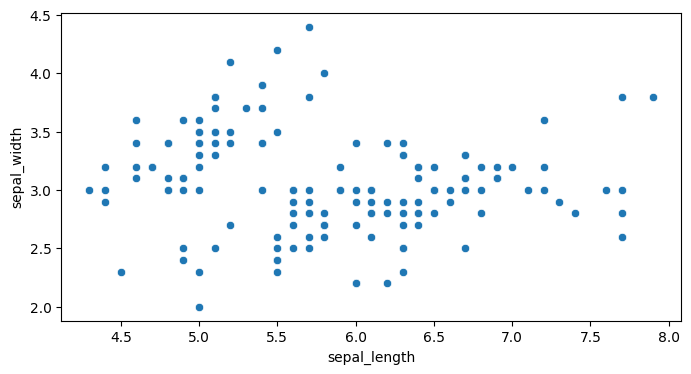

In [3]:
iris_df = sns.load_dataset("iris")

#plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (8,4)

display(iris_df.head(n=3))  # just view the first three rows
plot_raw = sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width')


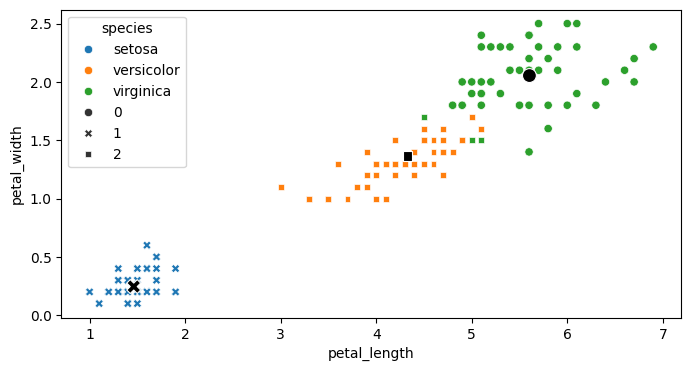

In [4]:
p_number_clusters = 3
p_covariance_type = 'full'  # {‘full’ (default), ‘tied’, ‘diag’, ‘spherical’}
p_max_iter = 10

gmm = GaussianMixture(n_components=p_number_clusters,
                      covariance_type=p_covariance_type,
                      max_iter=p_max_iter)
gmm.fit(iris_df[['petal_length', 'petal_width']]) # estimating (fitting) model parameters using the EM algorithm
gmm_labels = gmm.predict(iris_df[['petal_length', 'petal_width']]) # predicting the labels (clusters) for the samples using the fitted GMM

plot_gmm = sns.scatterplot(data=iris_df, x='petal_length', y='petal_width',
                           style=gmm_labels, hue=iris_df['species'])
plot_gmm = sns.scatterplot(x=gmm.means_[:, 0],
                           y=gmm.means_[:, 1],
                           ax=plot_gmm, color='black',
                           style=list(range(p_number_clusters)),
                           s=100, legend=False)

In [6]:
data_new,_ = gmm.sample(300)
data_new.shape

(300, 2)

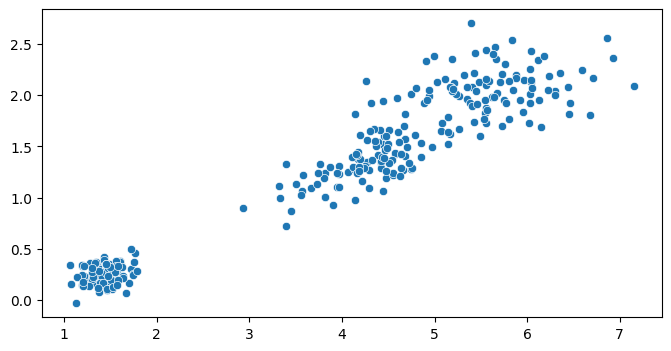

In [7]:
plot_new_data = sns.scatterplot(x=data_new[:,0], y=data_new[:,1])